In [1]:
import numpy as np
import scipy.stats as stats
from iminuit import Minuit
from matplotlib import pyplot as plt

In [9]:
f1_true     = 0.3
mu1_true    = 7.
sigma1_true = 4.

f2_true     = 0.7
mu2_true    = -6
sigma2_true = 4.

N          = 100000
N1_approx  = 100
N2_approx  = 100

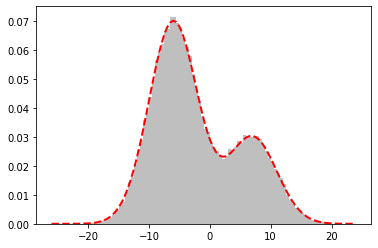

In [10]:
dataset1 = mu1_true + sigma1_true*np.random.normal(size=(int(N*f1_true),))
dataset2 = mu2_true + sigma2_true*np.random.normal(size=(int(N*f2_true),))
dataset = np.concatenate([dataset1, dataset2])

bins = np.linspace(-26, 24, 101)
plt.hist(dataset, bins=bins, density=True, color="grey", alpha=0.5)
plt.plot(bins, f1_true*stats.norm.pdf(bins, mu1_true, sigma1_true) + f2_true*stats.norm.pdf(bins, mu2_true, sigma2_true), "--", c="r", linewidth=2)
plt.show()

In [11]:
def TNLL (p) :
    mu1, sigma1 = p[0], np.fabs(p[1])/100
    L   = f1_true*stats.norm.pdf(dataset, mu1, sigma1) + f2_true*stats.norm.pdf(dataset, mu2_true, sigma2_true)
    return -2 * np.sum(np.log(L))

In [12]:
m = Minuit.from_array_func(TNLL, [0, 500], [5, 500], errordef=1)
m.migrad()
m.minos()
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | x0   |   6.961   |   0.030   |   -0.030   |    0.030   |         |         |       |
| 1 | x1   |   399.3   |    2.3    |    -2.2    |     2.3    |         |         |       |
------------------------------------------------------------------------------------------

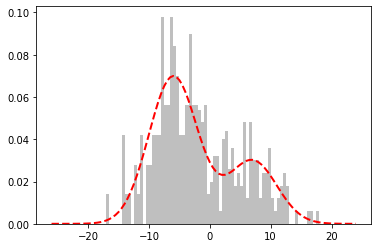

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | x0   |    6.37   |    0.03   |   -0.03    |    0.03    |         |         |       |
| 1 | x1   |   436.3   |    2.5    |    -2.5    |     2.5    |         |         |       |
------------------------------------------------------------------------------------------

In [14]:
dataset1 = mu1_true + sigma1_true*np.random.normal(size=(N1_approx,))
dataset2 = mu2_true + sigma2_true*np.random.normal(size=(N2_approx,))
dataset  = np.concatenate([dataset1, dataset2])

weights1 = np.full(fill_value=N*f1_true/N1_approx, shape=dataset1.shape)
weights2 = np.full(fill_value=N*f2_true/N2_approx, shape=dataset2.shape)
weights  = np.concatenate([weights1, weights2])

bins = np.linspace(-26, 24, 101)
plt.hist(dataset, bins=bins, weights=weights, density=True, color="grey", alpha=0.5)
plt.plot(bins, f1_true*stats.norm.pdf(bins, mu1_true, sigma1_true) + f2_true*stats.norm.pdf(bins, mu2_true, sigma2_true), "--", c="r", linewidth=2)
plt.show()

def dp_TNLL (p) :
    mu1, sigma1 = p[0], np.fabs(p[1])/100
    L   = f1_true*stats.norm.pdf(dataset, mu1, sigma1) + f2_true*stats.norm.pdf(dataset, mu2_true, sigma2_true)
    return -2 * np.log(L) * weights

def TNLL (p) :
    return np.sum(dp_TNLL(p))

m = Minuit.from_array_func(TNLL, [mu1_true, sigma1_true], [5, 500], errordef=1)
m.migrad()
m.minos()
m.get_param_states()

In [37]:
TNLL_ = dp_TNLL([mu2_true, sigma2_true])
L_    = np.exp(-0.5*TNLL_/1000.)

np.sum(L_)

28.669723189873306

(array([ 319.,  436.,  486.,  545.,  669.,  733.,  852., 1039., 1396.,
        3525.]),
 array([7.41146384e-05, 3.99609312e-02, 7.98477477e-02, 1.19734564e-01,
        1.59621381e-01, 1.99508197e-01, 2.39395014e-01, 2.79281831e-01,
        3.19168647e-01, 3.59055464e-01, 3.98942280e-01]),
 <a list of 10 Patch objects>)

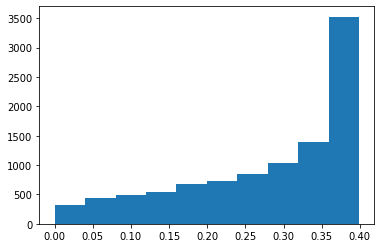

In [28]:
x = np.random.normal(size=(10000,))
y = stats.norm.pdf(x)

plt.hist(y)